# Libraries

In [16]:
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt 
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split

#### <font color='purple'> 1) Compute sigmoid using the following equation: </font>

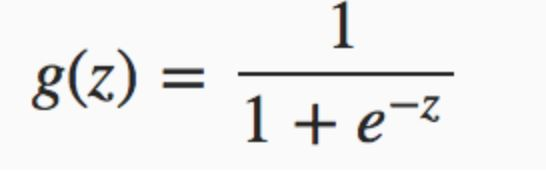

In [2]:
def sigmoid(z): return 1/(1+np.exp(-z)) 

z=np.array([0,2., -1, 22, 100])
print(sigmoid(z))

[0.5        0.88079708 0.26894142 1.         1.        ]


#### <font color='purple'> 2) Compute the loss using the following formula </font>

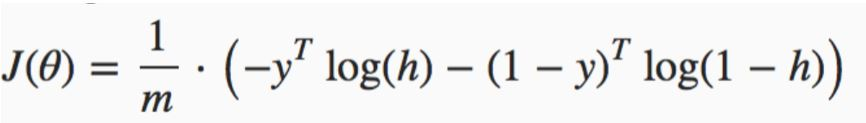

In [3]:
## y: correct outputs
## y_bar: predicted outputs

def loss_fun(y, y_bar):return (-y.T * np.log(y_bar) - (1 - y).T * np.log(1 - y_bar)).mean()

y_bar=np.array([0.5, 0.88079708 ,0.26894142, .1, .3])
y=np.array([1,1,0,1,0])
print(loss_fun(y, y_bar))

0.7585193823768298


#### <font color='purple'> 3) Compute the gradient using the following equation: </font>

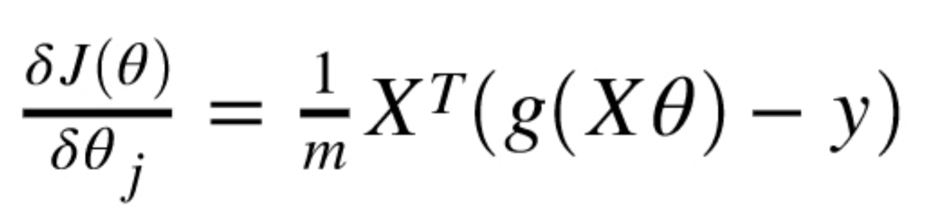

In [8]:
X=np.array([[1,0.77132064, 0.02075195, 0.63364823],
 [1, 1.74880388 ,0.49850701 ,0.22479665],
 [1, 0.19806286, 0.76053071 ,0.16911084],
 [1, 0.08833981 , 3.68535982 , -0.95339335],
 [1, -0.00394827 ,0.51219226 ,0.81262096]])

y_bar=np.array([0.5, 0.88079708 ,0.26894142, .1, .3])
y=np.array([1,1,0,1,0])

def compute_grad( x,y,y_bar):
    m = x.shape[0]
    return (1/m) * np.dot(x.T,(y_bar - y))

print(compute_grad(X, y, y_bar))

[-0.1900523  -0.12430917 -0.60568548  0.16074014]


#### <font color='purple'> 4) Compute $z$ using the following equation: </font>
$ z=X *\theta $

In [9]:
theta=np.array([-1, .0, -2., .022])

def f(X, theta): return np.dot(𝑋,theta) 
print(f(X, theta))

[-1.02756364 -1.99206849 -2.51734098 -8.39169429 -2.00650686]


#### <font color='purple'> 5) Writing a function to predict class labels for samples in X. </font>

In [11]:
def predict(X,theta):
    y_hat=sigmoid(f(X,theta))
    print(y_hat)
    y_hat=np.where(y_hat>=0.5,1,0)
    return y_hat
print(predict(X,theta))

[2.63556716e-01 1.20038198e-01 7.46514188e-02 2.26691383e-04
 1.18521435e-01]
[0 0 0 0 0]


#### <font color='purple'> 6)  Writing a function to compute the accuracy </font>

In [13]:
y_true=[1,1,1,0]
y_bar=[1,1,1,1]

def score(y, y_bar):
    correct = 0
    for i in range(len(y)):
        if y[i] == y_bar[i]:
            correct += 1
    return correct / (len(y)) 
print(score(y_true,y_bar))

0.75


#### Let’s also define the train function which will be used to find the model parameters that minimizes the cost function using functions above.

[-0.18732413 -0.16456771  0.22747216 -0.22780898]


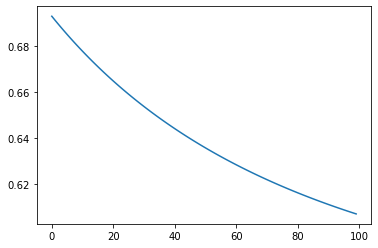

In [15]:
def train(X,y, lr=0.02, iter=100):
    loss=[]
    theta=np.zeros(X.shape[1])
    for i in range(iter):
        z=f(X,theta)
        
        a=sigmoid(z)
        loss_=loss_fun(y,a)
        g=compute_grad(X,y, a)
        theta=theta-lr *g
        loss.append(loss_)
    print(theta)
    ##print(loss)
    
    rr=list(range(iter))
    plt.plot(rr, loss)
    plt.show()

X=np.array([[1,0.77132064, 0.02075195, 0.63364823],
 [1, 1.74880388 ,0.49850701 ,0.22479665],
 [1, 0.19806286, 0.76053071 ,0.16911084],
 [1, 0.08833981 , 3.68535982 , -0.95339335],
 [1, -0.00394827 ,0.51219226 ,0.81262096]])
y=np.array([1,0,0,1,0])

train(X,y)

#### <font color='purple'> 6)  - Load cancer dataset from sklearn. Split the data into 70% for traing and 30% for testing. Train the training set using train function. Then, cacluate the accuracy on testing set</font>

In [20]:
x,y=datasets.load_breast_cancer(return_X_y=True)
# Split the data 
X_train,X_test,Y_train,Y_test=train_test_split(x,y,test_size=.30)

lg=LogisticRegression()
# trainig
lg.fit(X_train,Y_train)

C:\Users\ACER\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [21]:
# Test way 1
lg.score(X_test,Y_test)

0.9707602339181286

In [22]:
# Test way 2
def score(X_test,Y_test): 
    y_hat=lg.predict(X_test)
    acc=accuracy_score(Y_test,y_hat)
    return acc
score(X_test,Y_test) 

0.9707602339181286